In [44]:
import os
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [90]:
data_list=[]
for filepath in os.listdir('data/'):
    if filepath.endswith('.csv'):
        date_string=filepath.replace('.csv','')
        idata=pd.read_csv('data/'+filepath)
        idata['record_date']=datetime.datetime.strptime(date_string,'%Y%m%d')
        data_list.append(idata)
data   = pd.concat(data_list, ignore_index=True, sort=True)
date_max=data['record_date'].max()
print(f"截至{date_max.month}月{date_max.day}日，杭州公布病例{data.shape[0]}个。其中年龄最小和最大的分别为{data['age'].min()}岁和{data['age'].max()}岁。")

截至2月2日，杭州公布病例106个。其中年龄最小和最大的分别为4岁和88岁。


record_date
2020-01-25    15
2020-01-26     0
2020-01-27     5
2020-01-28    19
2020-01-29    18
2020-01-30    16
2020-01-31    13
2020-02-01    12
2020-02-02     8
Freq: D, dtype: int64


[]

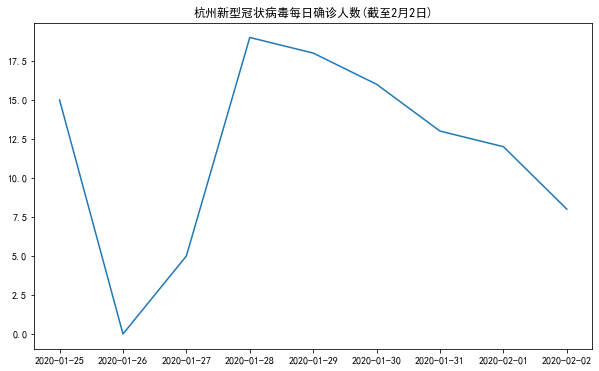

In [91]:
result=data.resample('1D',on='record_date').size()
print(result)
plt.figure(figsize=(10,6))
plt.plot(result)
plt.title(f'杭州新型冠状病毒每日确诊人数(截至{date_max.month}月{date_max.day}日)')
plt.plot()

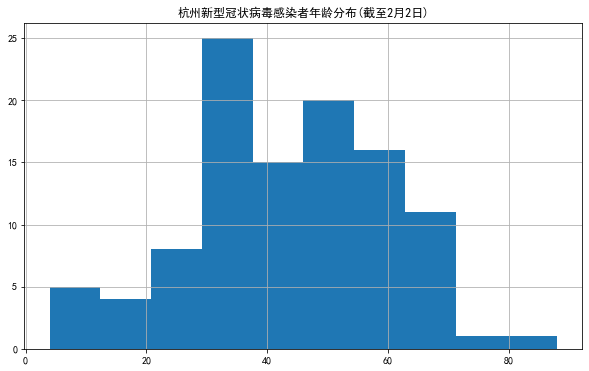

In [92]:
plt.figure(figsize=(10,6))
data['age'].hist()
plt.title(f'杭州新型冠状病毒感染者年龄分布(截至{date_max.month}月{date_max.day}日)')
plt.show()

女    58
男    48
Name: sex, dtype: int64


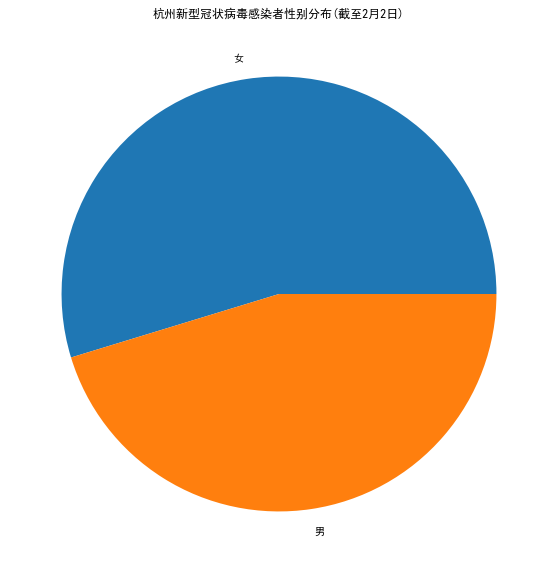

In [93]:
result=data['sex'].value_counts()
print(result)
plt.figure(figsize=(10,10))
plt.pie(result.values, labels=result.index)
plt.title(f'杭州新型冠状病毒感染者性别分布(截至{date_max.month}月{date_max.day}日)')
plt.show()

湖北来杭        48
病例的密切接触者    31
密切接触湖北人员     9
接触湖北人员       5
调查中          5
病例的接触者       4
入境排查         4
Name: infection_type, dtype: int64


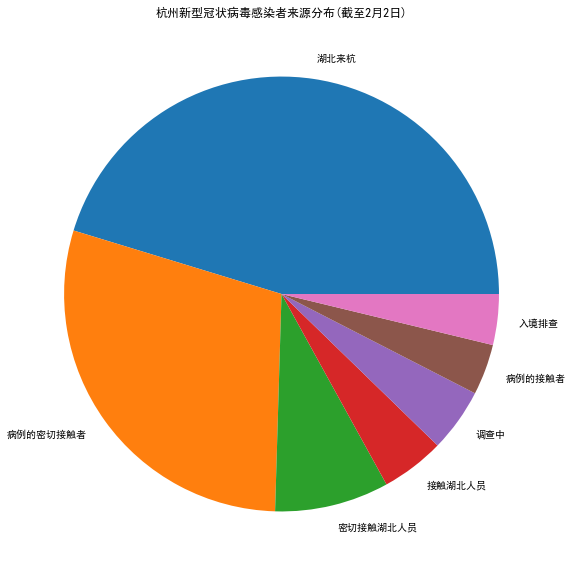

In [94]:
result=data['infection_type'].value_counts()
print(result)
plt.figure(figsize=(10,10))
plt.pie(result.values, labels=result.index)
plt.title(f'杭州新型冠状病毒感染者来源分布(截至{date_max.month}月{date_max.day}日)')
plt.show()